

---

## Web scraping and analysis



### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

# Data collection

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [56]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

In [57]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [58]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [60]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all ("div", {"class":"text_content"}):
        reviews.append(item.text)
    
    for item in soup.find_all ("div", {"class":"rating-10"}):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 30
Error on page 31
Error on page 32
Error on page 34
Error on page 34


In [61]:
len(reviews)

7000

In [62]:
len(country)

7000

In [63]:
len(date)

7000

In [64]:
len(stars)

7070

In [65]:
df = pd.DataFrame({"reviews":reviews, "date":date, "country": country})

In [66]:
df.head()

,reviews,date,country
0,Not Verified | Only the second time flying BA ...,14th May 2023,United States
1,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom
2,✅ Trip Verified | I booked business class tic...,13th May 2023,United States
3,✅ Trip Verified | I will never travel with Br...,8th May 2023,Australia
4,✅ Trip Verified | I am already in Portugal so...,6th May 2023,United Kingdom


In [67]:
df1 = pd.DataFrame({"stars": stars}) # for star length we have to create another dataframe then join that to main df
df1

,stars
0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,3
2,3
3,1
4,1
...,...
7065,2
7066,6
7067,7
7068,10


In [68]:
df2  = df.join(df1)
df2.head()

,reviews,date,country,stars
0,Not Verified | Only the second time flying BA ...,14th May 2023,United States,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,3
2,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,3
3,✅ Trip Verified | I will never travel with Br...,8th May 2023,Australia,1
4,✅ Trip Verified | I am already in Portugal so...,6th May 2023,United Kingdom,1


In [69]:
df2.shape

(7000, 4)

In [70]:
df2 = pd.DataFrame()
df2["reviews"] = reviews
df2.head()

,reviews
0,Not Verified | Only the second time flying BA ...
1,✅ Trip Verified | I wasn't going to bother rev...
2,✅ Trip Verified | I booked business class tic...
3,✅ Trip Verified | I will never travel with Br...
4,✅ Trip Verified | I am already in Portugal so...


# Data Cleaning

In [71]:
import os

cwd = os.getcwd()


In [78]:
df.to_csv(cwd+ "/BA_reviews.csv")
df.head(10)

,reviews,date,country
0,Not Verified | Only the second time flying BA ...,14th May 2023,United States
1,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom
2,✅ Trip Verified | I booked business class tic...,13th May 2023,United States
3,✅ Trip Verified | I will never travel with Br...,8th May 2023,Australia
4,✅ Trip Verified | I am already in Portugal so...,6th May 2023,United Kingdom
5,✅ Trip Verified | Terrible. Avoid this airlin...,6th May 2023,United Kingdom
6,✅ Trip Verified | Despite being a gold member...,1st May 2023,United Kingdom
7,Not Verified | Regarding the aircraft and seat...,28th April 2023,United Kingdom
8,Not Verified | I travelled with British Airway...,26th April 2023,Sweden
9,Not Verified | Food was lousy. Who ever is pl...,24th April 2023,United States


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [79]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [80]:
df['verified']

0       False
1        True
2        True
3        True
4        True
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: verified, Length: 7000, dtype: bool

In [81]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = " ".join(rev)
    corpus.append(rev)

In [82]:
df['corpus'] = corpus

In [83]:
df.head()

,reviews,date,country,verified,corpus
0,Not Verified | Only the second time flying BA ...,14th May 2023,United States,False,not verified only the second time flying ba as...
1,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,True,i wasn t going to bother reviewing this flight...
2,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,True,i booked business class tickets for my fianc a...
3,✅ Trip Verified | I will never travel with Br...,8th May 2023,Australia,True,i will never travel with british airways again...
4,✅ Trip Verified | I am already in Portugal so...,6th May 2023,United Kingdom,True,i am already in portugal so contacted them tod...


In [85]:
df2  = df.join(df1)
df2.head()

,reviews,date,country,verified,corpus,stars
0,Not Verified | Only the second time flying BA ...,14th May 2023,United States,False,not verified only the second time flying ba as...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,True,i wasn t going to bother reviewing this flight...,3
2,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,True,i booked business class tickets for my fianc a...,3
3,✅ Trip Verified | I will never travel with Br...,8th May 2023,Australia,True,i will never travel with british airways again...,1
4,✅ Trip Verified | I am already in Portugal so...,6th May 2023,United Kingdom,True,i am already in portugal so contacted them tod...,1


In [86]:
df2.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '3', '1', '2', '5', '10', '4',
       '9', '7', '8', '6', 'None'], dtype=object)

In [87]:
df2.stars = df2.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
df2.head()

,reviews,date,country,verified,corpus,stars
0,Not Verified | Only the second time flying BA ...,14th May 2023,United States,False,not verified only the second time flying ba as...,5
1,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,True,i wasn t going to bother reviewing this flight...,3
2,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,True,i booked business class tickets for my fianc a...,3
3,✅ Trip Verified | I will never travel with Br...,8th May 2023,Australia,True,i will never travel with british airways again...,1
4,✅ Trip Verified | I am already in Portugal so...,6th May 2023,United Kingdom,True,i am already in portugal so contacted them tod...,1


In [88]:
df2.stars.value_counts()

1       1557
2        786
3        781
8        702
10       616
7        601
9        595
5        519
4        471
6        362
None      10
Name: stars, dtype: int64

In [89]:
df2.drop(df2[df2.stars == "None"].index, axis=0, inplace=True)

In [90]:
df2.stars.unique()

array(['5', '3', '1', '2', '10', '4', '9', '7', '8', '6'], dtype=object)

In [91]:
df.dtypes

reviews     object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [92]:
df2.dtypes

reviews     object
date        object
country     object
verified      bool
corpus      object
stars       object
dtype: object

In [93]:
df2.date = pd.to_datetime(df2.date)

In [94]:
df2.date.head()

0   2023-05-14
1   2023-05-14
2   2023-05-13
3   2023-05-08
4   2023-05-06
Name: date, dtype: datetime64[ns]

In [95]:
df2.isnull().value_counts()

reviews  date   country  verified  corpus  stars
False    False  False    False     False   False    6990
dtype: int64

In [97]:
df2.shape

(6990, 6)

In [98]:
df2.reset_index(drop=True)

,reviews,date,country,verified,corpus,stars
0,Not Verified | Only the second time flying BA ...,2023-05-14,United States,False,not verified only the second time flying ba as...,5
1,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,True,i wasn t going to bother reviewing this flight...,3
2,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,True,i booked business class tickets for my fianc a...,3
3,✅ Trip Verified | I will never travel with Br...,2023-05-08,Australia,True,i will never travel with british airways again...,1
4,✅ Trip Verified | I am already in Portugal so...,2023-05-06,United Kingdom,True,i am already in portugal so contacted them tod...,1
...,...,...,...,...,...,...
6985,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,2014-05-18,United Kingdom,False,lgw antigua on april and antigua lgw on may bo...,5
6986,LHR-JTR-LHR. A tale of opposites for BA's new ...,2014-05-18,United Kingdom,False,lhr jtr lhr a tale of opposites for ba s new r...,1
6987,Gatwick-Venice return. Two contrasting experie...,2014-05-18,United Kingdom,False,gatwick venice return two contrasting experien...,3
6988,1st Class LHR-PHX. Totally seamless flight. Gr...,2014-05-18,United Kingdom,False,st class lhr phx totally seamless flight great...,2


In [99]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [100]:
df2.head()

,reviews,date,country,verified,corpus,stars
0,Not Verified | Only the second time flying BA ...,2023-05-14,United States,False,not verified only the second time flying ba as...,5
1,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,True,i wasn t going to bother reviewing this flight...,3
2,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,True,i booked business class tickets for my fianc a...,3
3,✅ Trip Verified | I will never travel with Br...,2023-05-08,Australia,True,i will never travel with british airways again...,1
4,✅ Trip Verified | I am already in Portugal so...,2023-05-06,United Kingdom,True,i am already in portugal so contacted them tod...,1


In [129]:
df2.stars.unique()

array(['5', '3', '1', '2', '10', '4', '9', '7', '8', '6'], dtype=object)

In [131]:
df.stars.mean()

4.7558616647127785

# EDA

#### What is the total counts for each ratings?

Text(0.5, 1.0, 'Counts for each ratings')

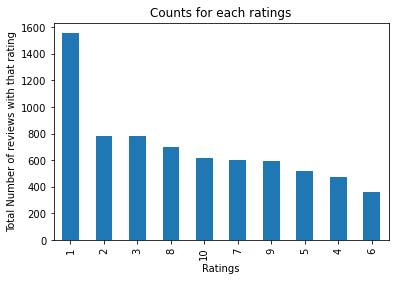

In [108]:
df2.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Counts for each ratings")

In [110]:
df2_ratings = pd.DataFrame(df2.stars.value_counts())
df2_ratings

,stars
1,1557
2,786
3,781
8,702
10,616
7,601
9,595
5,519
4,471
6,362


In [116]:
pct_values = (df2_ratings.stars.values/ df2_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df2_ratings['pct_values'] = pct_values

In [117]:
pct_values

[22.27, 11.24, 11.17, 10.04, 8.81, 8.6, 8.51, 7.42, 6.74, 5.18]

In [118]:
df2_ratings['pct_values']

1     22.27
2     11.24
3     11.17
8     10.04
10     8.81
7      8.60
9      8.51
5      7.42
4      6.74
6      5.18
Name: pct_values, dtype: float64

In [119]:
df2_ratings = df2_ratings.reset_index()

In [120]:
df2_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [121]:
df2_ratings

,Stars,total_counts,pct_values
0,1,1557,22.27
1,2,786,11.24
2,3,781,11.17
3,8,702,10.04
4,10,616,8.81
5,7,601,8.60
6,9,595,8.51
7,5,519,7.42
8,4,471,6.74
9,6,362,5.18


Text(0.5, 1.0, 'Counts for each ratings')

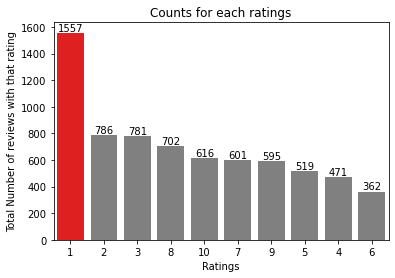

In [122]:

clrs = ['Red' if (x ==  max(df2_ratings.total_counts)) else 'grey' for x in df2_ratings.total_counts ]
ax = sns.barplot(x=df2_ratings.Stars, y=df2_ratings.total_counts, data=df2_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [123]:
 #Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

67 unique countries


#### Which country most review comes from?  

In [124]:
df2_country_review = pd.DataFrame(df2.country.value_counts().head()).reset_index()

In [125]:
df2_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

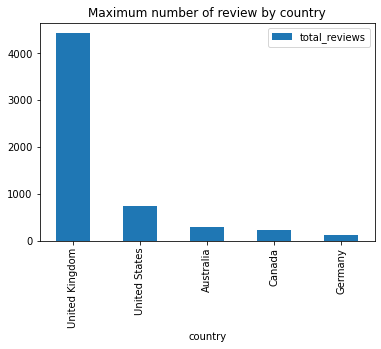

In [126]:
df2_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

#### Which country provided on average highest ratings?

In [237]:
df2_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df2_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean(numeric_only=True).sort_values(ascending=False)).reset_index()

C:\Users\SneGo\AppData\Local\Temp\ipykernel_12340\2027615146.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [141]:
df2_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

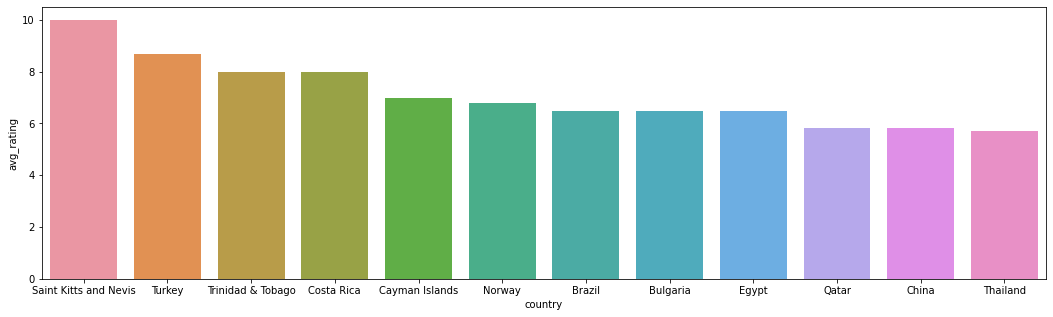

In [142]:
fig = plt.figure(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df2_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Time Series Analysis

In [145]:
#convert the date datatype to datetime

df2.date = pd.to_datetime(df2.date)

In [146]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Word Frequency

In [153]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'service'),
  Text(1, 0, 't'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'food'),
  Text(4, 0, 'airways'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'seats'),
  Text(7, 0, 'good'),
  Text(8, 0, 'time'),
  Text(9, 0, 'cabin'),
  Text(10, 0, 'class'),
  Text(11, 0, 'business'),
  Text(12, 0, 'staff'),
  Text(13, 0, 's'),
  Text(14, 0, 'economy'),
  Text(15, 0, 'check'),
  Text(16, 0, 'flights'),
  Text(17, 0, 'return'),
  Text(18, 0, 'just'),
  Text(19, 0, 'club')])

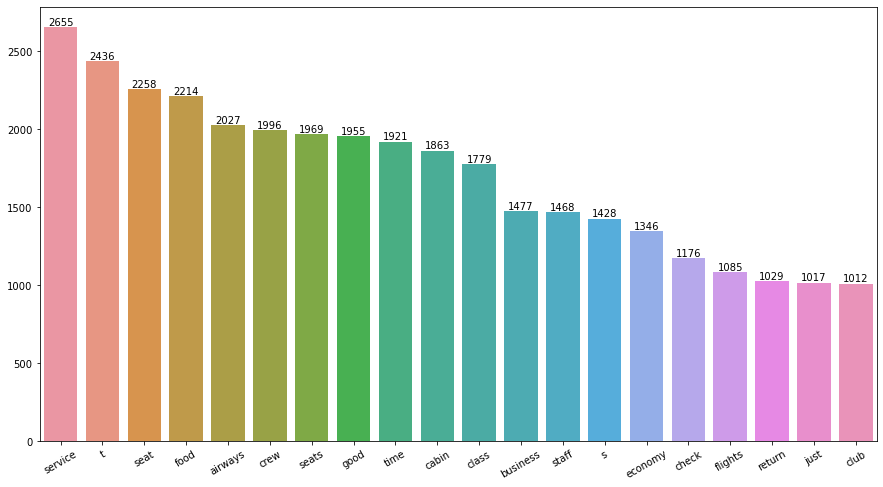

In [155]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

## Word Frequency with N-gram

<AxesSubplot:>

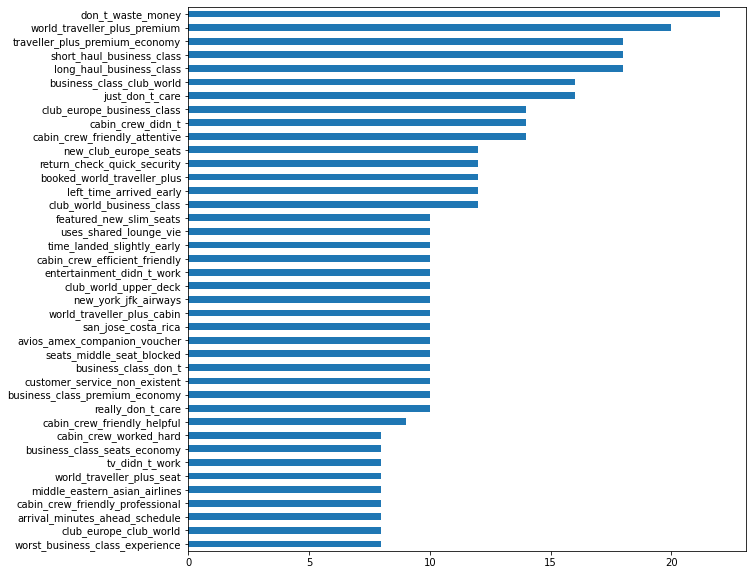

In [186]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df2.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [196]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SneGo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SneGo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [221]:
!pip install textblob

In [223]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df2['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df2['polarity'][i] = polarity

In [226]:
from textblob import TextBlob

# Create a new column 'polarity' with all 0 values initially
df2['polarity'] = df2['corpus'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['polarity']

0       0.035823
1       0.148154
2       0.071296
3      -0.059510
4      -0.450000
          ...   
6995   -0.035860
6996    0.079063
6997    0.277668
6998    0.526667
6999    0.048780
Name: polarity, Length: 6990, dtype: float64

In [225]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2424 number of reviews between -0.2 and 0.2 polarity score
1482 number of reviews between -0.1 and 0.1 polarity score


In [ ]:
Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for
positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is
negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, 
let's take the threshold of 0.1.

## Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). 
For this purpose we will use count vectorizer method from sklearn library. 

In [227]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()


In [228]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [229]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,the,6190.4,the,6585.1,dhabi,27.1,to,2810.7,ncl,8.9,to,5557.3,and,2831.5,the,5949.8
1,was,3360.3,and,3880.1,abu,27.1,we,2604.5,prawn,8.1,the,4525.0,the,2265.8,to,3384.3
2,to,2895.4,was,3550.2,bari,10.1,the,2111.5,beijing,6.7,and,2955.1,was,1634.2,and,3009.6
3,and,2733.6,of,2523.5,jersey,8.9,and,1640.2,ibiza,6.1,my,2047.5,on,1554.6,is,2157.5
4,in,1595.9,to,2469.3,by,8.4,our,1178.1,satay,5.1,was,1917.7,flight,1239.3,in,1813.6
5,of,1439.5,in,1484.4,at,8.1,were,925.7,spirits,5.1,for,1562.3,to,1222.4,of,1581.3
6,flight,1228.1,on,1447.8,jo,6.8,was,821.0,beside,4.7,in,1557.8,very,1036.9,ba,1500.5
7,on,1189.5,with,1211.4,burg,6.8,for,812.0,thai,4.3,flight,1531.4,in,1030.2,on,1339.3
8,were,1133.3,it,1060.2,service,6.6,in,803.6,rtn,4.1,that,1521.5,good,1006.5,for,1189.0
9,at,1055.1,for,953.5,no,6.5,flight,720.0,dressing,4.1,they,1496.3,with,795.9,you,1176.0


## Topic modeling with NMF

In [236]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0, max_iter=500)
nmf.fit_transform(tf)

array([[0.0412343 , 0.06814602],
       [0.07574419, 0.1545872 ],
       [0.0026195 , 0.11955308],
       ...,
       [0.19387815, 0.09282924],
       [0.02261713, 0.13173061],
       [0.13326921, 0.07128175]])

In [234]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df2_topic =pd.DataFrame(topic_dict)

In [235]:
df2_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,the,81.0,to,47.4
1,and,38.3,and,16.9
2,was,31.5,the,15.7
3,of,20.4,we,13.9
4,in,17.5,for,11.7
5,on,15.6,my,10.4
6,to,12.8,that,10.4
7,with,10.6,in,9.8
8,is,10.5,flight,9.6
9,it,9.1,they,9.1
